# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras import datasets

# Import Dataset

In [3]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# we will copy the data to new dataframe to use it.
df = data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing

In [5]:
categorical_data= data[['sex','smoker','region']]
categorical_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [6]:
numerical_data= data.drop(categorical_data, axis= 1)
numerical_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [9]:
en = preprocessing.OneHotEncoder()

In [10]:
en.fit(label_encoder)

OneHotEncoder()

In [11]:
onehotlabels = en.transform(label_encoder).toarray()
onehotlabels

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [12]:
onehotlabel = pd.DataFrame(onehotlabels)
onehotlabel

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
data_encoded=pd.concat([numerical_data, onehotlabel], axis=1)
data_encoded

,age,bmi,children,charges,0,1,2,3,4,5,6,7
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
data_encoded.age.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [15]:
#Create a column for ptients >30 years and <30 years.
data_encoded['age'] = [2 if each < 30 else 1 for each in data_encoded['age']]

In [16]:
data_encoded

,age,bmi,children,charges,0,1,2,3,4,5,6,7
0,2,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,2,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,2,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,2,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Split the Data to train & test & Validation

In [17]:
# we will split first the data into x & y
# y is the target column
y = data_encoded['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [18]:
# Look at y
y.shape

(1338,)

In [19]:
x = data_encoded.drop('charges' , axis = 1)
x

,age,bmi,children,0,1,2,3,4,5,6,7
0,2,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,2,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,2,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,2,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Look at x.
x.shape

(1338, 11)

In [21]:
# second we will take 20% from the data to x_test & y_test Randomly.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Look at the shape.
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [23]:
# Third split x_train & y_train into x_valid & xnew_train.we will use it after splitting in the model.
xnew_train, x_valid = train_test_split(x_train, test_size=0.3, random_state=42)

In [24]:
# Look at the shape.
xnew_train.shape, x_valid.shape

((749, 11), (321, 11))

Look at the Data

In [25]:
xnew_train

,age,bmi,children,0,1,2,3,4,5,6,7
671,2,31.160,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
767,1,29.000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
491,1,25.080,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
195,2,30.590,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,2,17.290,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
953,1,30.200,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
450,1,29.600,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
83,1,41.230,4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
747,2,21.755,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
x_valid

,age,bmi,children,0,1,2,3,4,5,6,7
1049,1,30.900,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
257,1,40.150,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1022,1,36.080,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1071,1,31.445,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
17,2,23.845,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
207,1,27.740,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
987,1,27.645,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
527,1,25.800,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
972,2,20.235,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Normalization

In [27]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

In [28]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
x_trainscal = trans.fit_transform(xnew_train)
x_trainscal

array([[1.        , 0.39501583, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33553628, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.2275919 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.67231172, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.13603194, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.4952499 , 0.6       , ..., 0.        , 0.        ,
        1.        ]])

In [29]:
x_validscal = trans.transform(x_valid)
x_validscal

array([[0.        , 0.38785626, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.64257194, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.53049704, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.24741842, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.09417596, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.28046262, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [30]:
y_trainn= pd.DataFrame(y_train)
y_trainn

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [31]:
y_trainscal = trans.fit_transform(y_trainn)
y_trainscal

array([[0.13131338],
       [0.12059016],
       [0.42290056],
       ...,
       [0.1758431 ],
       [0.73191648],
       [0.14791954]])

In [32]:
# Third split x_train & y_train into y_valid & ynew_train.we will use it after splitting in the model.
ynew_train, y_valid = train_test_split(y_trainscal, test_size=0.3, random_state=42)

In [33]:
y_valid

array([[6.28031765e-01],
       [6.96117951e-02],
       [6.68433324e-01],
       [2.09083663e-01],
       [2.07137946e-02],
       [1.21725852e-01],
       [5.39504733e-02],
       [1.22993852e-02],
       [1.27036501e-01],
       [1.06040822e-01],
       [1.71406117e-01],
       [6.59729104e-01],
       [4.08561865e-01],
       [8.39478969e-02],
       [5.76814074e-02],
       [6.39279428e-01],
       [1.85020857e-01],
       [1.50461824e-01],
       [5.70960811e-01],
       [1.60034101e-01],
       [1.40343199e-01],
       [3.68226526e-02],
       [1.87429911e-01],
       [2.38157305e-02],
       [3.03821003e-01],
       [1.95063218e-01],
       [1.39917940e-01],
       [1.67106307e-01],
       [1.69454657e-01],
       [5.20332676e-02],
       [4.46548996e-02],
       [7.39816094e-01],
       [1.57563933e-01],
       [7.07184324e-02],
       [8.86543276e-02],
       [1.15326355e-01],
       [2.21545463e-02],
       [6.01980984e-01],
       [3.79928827e-01],
       [2.77138851e-01],


In [34]:
y_valid.shape

(321, 1)

In [35]:
ynew_train

array([[4.59032965e-02],
       [9.64482142e-02],
       [3.80524437e-01],
       [8.42168188e-03],
       [1.90456985e-01],
       [6.35465952e-02],
       [7.52907984e-01],
       [1.99826204e-01],
       [3.82218563e-02],
       [2.10681641e-02],
       [8.52291287e-02],
       [7.08653342e-02],
       [1.07448719e-01],
       [1.02799356e-01],
       [1.02448375e-01],
       [3.86327914e-01],
       [2.17230445e-02],
       [1.39623469e-01],
       [1.46978403e-01],
       [1.69690264e-01],
       [7.53868014e-01],
       [1.39855869e-02],
       [1.02878499e-01],
       [1.06729941e-01],
       [2.75123135e-01],
       [1.74400420e-01],
       [1.21365009e-01],
       [1.38208076e-01],
       [6.03334279e-02],
       [1.92306667e-02],
       [5.79869344e-02],
       [6.16964286e-01],
       [1.92895581e-01],
       [2.14114187e-02],
       [4.19785604e-01],
       [1.12326020e-01],
       [2.03258201e-01],
       [1.26389122e-01],
       [5.82205180e-01],
       [9.53502477e-03],


In [36]:
ynew_train.shape

(749, 1)

# Train the model

In [37]:
#  Design Model

from keras import layers

In [38]:
# Define Sequential model with 10 hidden layers

tf.random.set_seed(500)

model = keras.Sequential(
    [  
        layers.InputLayer(input_shape=(11, )),
        layers.Dense(1200, activation="relu", name="hiddenlayer1"),
        layers.Dense(1100, activation="relu", name="hiddenlayer2"),
        layers.Dense(1000, activation="relu", name="hiddenlayer3"),
        layers.Dense(900, activation="relu", name="hiddenlayer4"),
        layers.Dense(800, activation="relu", name="hiddenlayer5"),
        layers.Dense(700, activation="relu", name="hiddenlayer6"),
        layers.Dense(600, activation="relu", name="hiddenlayer7"),
        layers.Dense(500, activation="relu", name="hiddenlayer8"),
        layers.Dense(400, activation="relu", name="hiddenlayer9"),
        layers.Dense(300, activation="relu", name="hiddenlayer10"),
        layers.Dense(200, activation="relu", name="hiddenlayer11"),
        layers.Dense(100, activation="relu", name="hiddenlayer12"),
        layers.Dense(50, activation="relu", name="hiddenlayer13"),
        layers.Dense(20, activation="relu", name="hiddenlayer14"),
        layers.Dense(1, name="outputlayer"),
    ]
)

In [39]:
# Look at model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 1200)              14400     
                                                                 
 hiddenlayer2 (Dense)        (None, 1100)              1321100   
                                                                 
 hiddenlayer3 (Dense)        (None, 1000)              1101000   
                                                                 
 hiddenlayer4 (Dense)        (None, 900)               900900    
                                                                 
 hiddenlayer5 (Dense)        (None, 800)               720800    
                                                                 
 hiddenlayer6 (Dense)        (None, 700)               560700    
                                                                 
 hiddenlayer7 (Dense)        (None, 600)               4

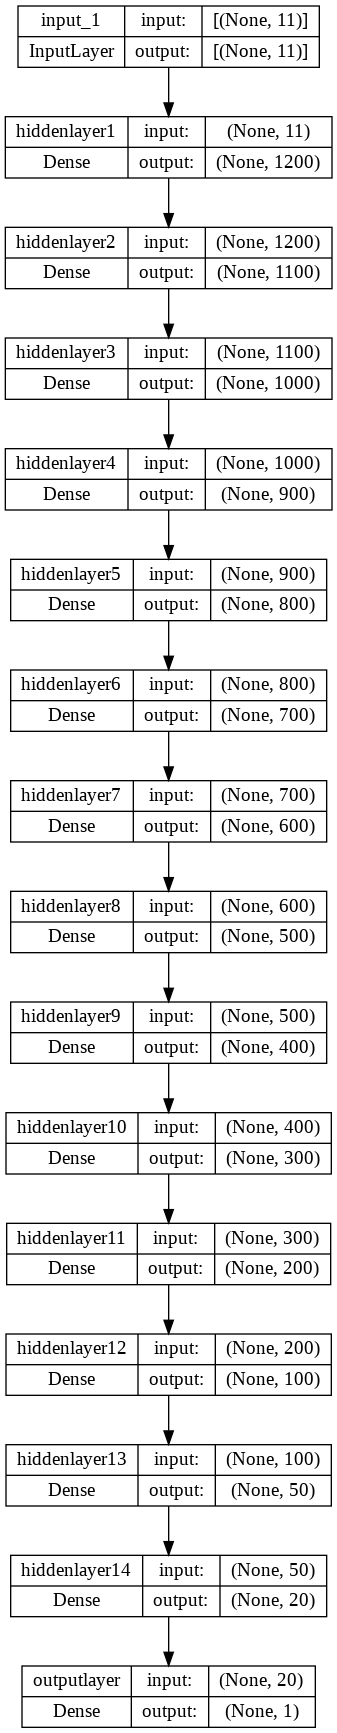

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file= 'model_plot.png', show_shapes = True, show_layer_names=True)

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')

In [42]:
model_training = model.fit(x=x_trainscal, y=ynew_train, batch_size=32, validation_data=(x_valid, y_valid), verbose=1, epochs=100)

Epoch 1/100
24/24 [==============================] - 7s 203ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 4.6634 - val_accuracy: 0.0031
Epoch 2/100
24/24 [==============================] - 3s 145ms/step - loss: 0.0142 - accuracy: 0.0000e+00 - val_loss: 36.1845 - val_accuracy: 0.0031
Epoch 3/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 277.6718 - val_accuracy: 0.0031
Epoch 4/100
24/24 [==============================] - 4s 158ms/step - loss: 0.0156 - accuracy: 0.0000e+00 - val_loss: 138.8784 - val_accuracy: 0.0031
Epoch 5/100
24/24 [==============================] - 4s 184ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 226.8498 - val_accuracy: 0.0031
Epoch 6/100
24/24 [==============================] - 4s 165ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 387.0225 - val_accuracy: 0.0031
Epoch 7/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - va

In [43]:
# History
pd.DataFrame(model_training.history)

,loss,accuracy,val_loss,val_accuracy
0,0.039985,0.0,4.663444,0.003115
1,0.014220,0.0,36.184532,0.003115
2,0.010764,0.0,277.671814,0.003115
3,0.015617,0.0,138.878357,0.003115
4,0.009058,0.0,226.849762,0.003115
...,...,...,...,...
95,0.005373,0.0,7.527651,0.003115
96,0.005479,0.0,11.655853,0.003115
97,0.005075,0.0,0.100280,0.003115
98,0.005756,0.0,0.222545,0.006231


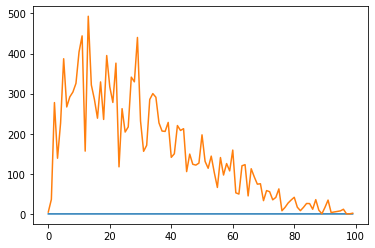

In [44]:
# Plot the Losses
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

In [45]:
# Predection
pred = model.predict(x_test).argmax(axis=-1)
pred

9/9 [==============================] - 0s 22ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [46]:
# Evaluation
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 16ms/step - loss: 323377184.0000 - accuracy: 0.0000e+00


[323377184.0, 0.0]

In [47]:
# Evaluation by mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

323425978.93488324